In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
from scipy.stats import chi2_contingency
import pandas as pd
import numpy as np
from sklearn import preprocessing, neighbors, svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
df = pd.read_csv('../data/2021 Line 187 allscripts.csv')
# df = pd.read_csv('data/2019 Silver Streak allscripts.csv')
df = df.replace(',','', regex=True)

# df['Actual Depart Hour'] = df['Actual Depart'].str.split(':',expand=True)[0]
# df['Actual Depart Hour'] = df['Actual Depart Hour'].astype(int)
df['Transit Date Month'] = df['Transit Date'].str.split('/',expand=True)[0]
df['Transit Date Month'] = df['Transit Date Month'].astype(int)

/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_51259/1156677042.py:11: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set(Title="2019 Bus Departure Time Difference Correlation with Prev Departure Offset")
No handles with labels found to put in legend.


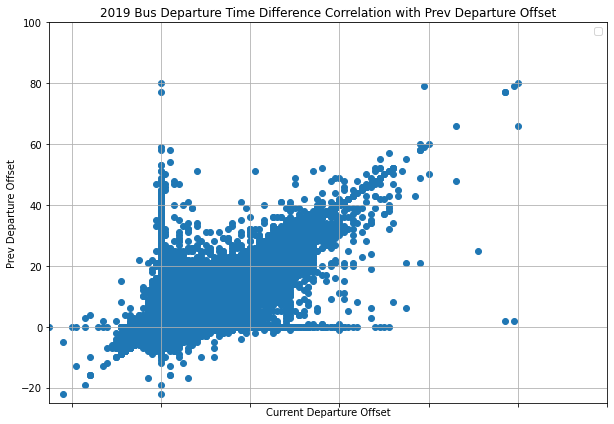

0.647585497532084

In [8]:
# stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual = df
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(111)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=-25,top=100)
ax1.set(Title="2019 Bus Departure Time Difference Correlation with Prev Departure Offset")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'])
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


# stopactual = df.loc[df['Bus Stop ID'] == 782]
# stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
# stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

# ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
# ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 782', color='orange')
# plt.setp(ax2.get_xticklabels(), visible=False)
# plt.legend()
# plt.grid()


# stopactual = df.loc[df['Bus Stop ID'] == 733]
# stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
# stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

# ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
# ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 733', color='green')
# plt.legend()
# plt.grid()

ax1.set(xlabel="Current Departure Offset")
ax1.set(ylabel="Prev Departure Offset")

locs, labels = plt.xticks() 



plt.show()

df = pd.read_csv('../data/2019 Line 187 allscripts.csv')
df = df.replace(',','', regex=True)

df['Difference (Minutes)'] = df['Difference (Minutes)'].astype(int)
df['Prev Departure Offset'] = df['Prev Departure Offset'].astype(int)
df['Difference (Minutes)'].corr(df['Prev Departure Offset'])

/var/folders/sl/46hc8zqn0l9_kwvskdqj7z8h0000gn/T/ipykernel_51259/151594892.py:10: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Prev Departure Offset")


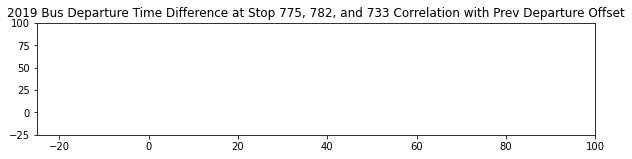

0.647585497532084

In [7]:
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=-25,top=100)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Prev Departure Offset")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=True)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=True)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Prev Departure Offset'] = stopactual['Prev Departure Offset'].astype(int)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Prev Departure Offset'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Prev Departure Offset")

locs, labels = plt.xticks() 



plt.show()

df['Difference (Minutes)'].corr(df['Prev Departure Offset'])

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be se

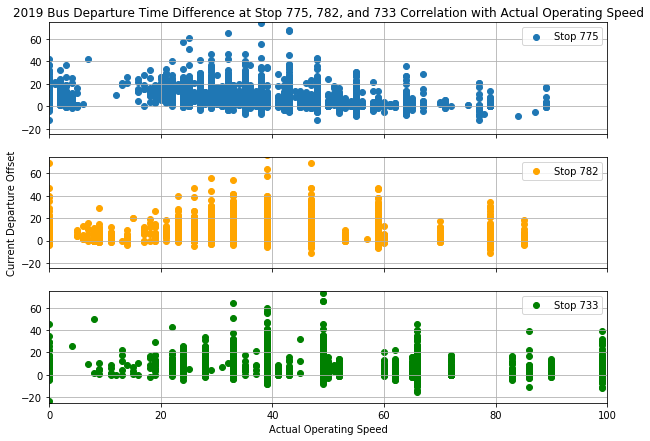

-0.004712001669366665

In [ ]:
df['Actual Operating Speed'] = df['Actual Operating Speed'].fillna(0).astype(int)
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = 0,right=100)
ax1.set_ylim(bottom=-25,top=75)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Actual Operating Speed")
# plt.ylim(0,15)
ax1.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Actual Operating Speed'] = stopactual['Actual Operating Speed'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Actual Operating Speed'], stopactual['Difference (Minutes)'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax2.set(ylabel="Current Departure Offset")
ax3.set(xlabel="Actual Operating Speed")

locs, labels = plt.xticks() 



plt.show()
df['Difference (Minutes)'].corr(df['Actual Operating Speed'])

C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

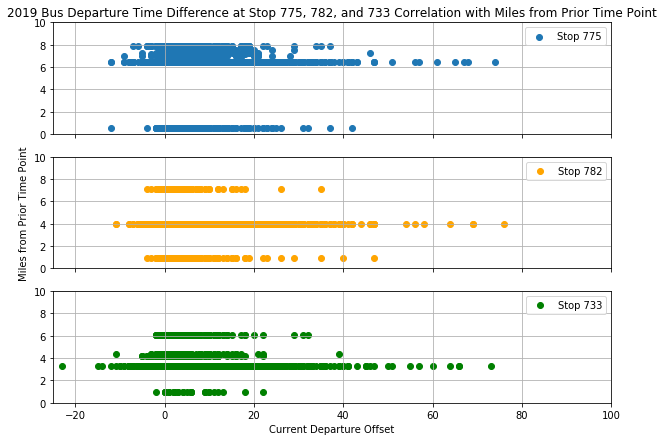

-0.03954615466397029

In [ ]:
stopactual = df.loc[df['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set_xlim(left = -25,right=100)
ax1.set_ylim(bottom=0,top=10)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Miles from Prior Time Point")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df.loc[df['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Miles from Prior Time Point'] = stopactual['Miles from Prior Time Point'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Miles from Prior Time Point'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Miles from Prior Time Point")

locs, labels = plt.xticks() 



plt.show()
df['Difference (Minutes)'].corr(df['Miles from Prior Time Point'])

In [ ]:

print(df['Difference (Minutes)'].corr(df['Actual Depart Hour']))
print(df['Difference (Minutes)'].corr(df['Transit Date Month']))


0.0793491297012282
0.06263180146297416


0         1
1         0
2         0
3         0
4         1
         ..
202608    4
202609    4
202610    2
202611    2
202612    1
Name: Dwell Time, Length: 202613, dtype: int32
0         1.000000
4         1.000000
5         0.333333
6         1.000000
7         0.500000
            ...   
202608    0.250000
202609    0.250000
202610    0.500000
202611    0.500000
202612    1.000000
Name: Inverse Dwell Time, Length: 125372, dtype: float64


C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Jai\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

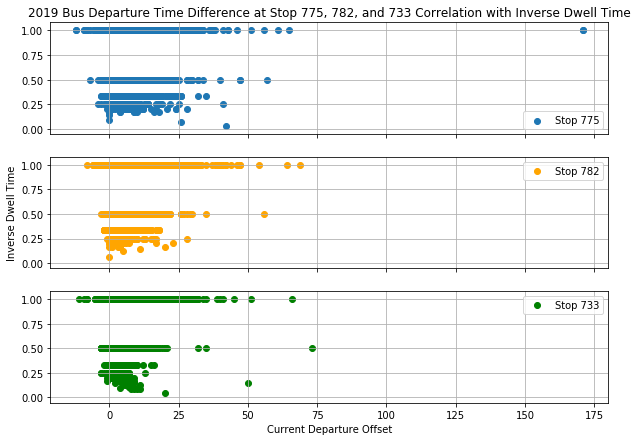

-0.11072341664181824
0.16536312251623117


In [ ]:

df['Dwell Time'] = df['Dwell Time'].fillna(0).astype(int)
df1 = df.loc[df['Dwell Time'] != 0]
print(df['Dwell Time'])
df1['Inverse Dwell Time'] = 1/df1['Dwell Time']
print(df1['Inverse Dwell Time'])
stopactual = df1.loc[df1['Bus Stop ID'] == 775]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

f=plt.figure(figsize=(10,7))

ax1=f.add_subplot(311)
ax1.set(Title="2019 Bus Departure Time Difference at Stop 775, 782, and 733 Correlation with Inverse Dwell Time")
# plt.ylim(0,15)
ax1.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 775')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df1.loc[df1['Bus Stop ID'] == 782]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

ax2=f.add_subplot(312, sharex=ax1, sharey=ax1)
ax2.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 782', color='orange')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.legend()
plt.grid()


stopactual = df1.loc[df1['Bus Stop ID'] == 733]
stopactual['Difference (Minutes)'] = stopactual['Difference (Minutes)'].astype(int)
stopactual['Inverse Dwell Time'] = stopactual['Inverse Dwell Time'].astype(float)

ax3=plt.subplot(313, sharex=ax1, sharey=ax1)
ax3.scatter(stopactual['Difference (Minutes)'], stopactual['Inverse Dwell Time'], label = 'Stop 733', color='green')
plt.legend()
plt.grid()

ax3.set(xlabel="Current Departure Offset")
ax2.set(ylabel="Inverse Dwell Time")

locs, labels = plt.xticks() 



plt.show()
print(df1['Difference (Minutes)'].corr(df1['Dwell Time']))
print(df1['Difference (Minutes)'].corr(df1['Inverse Dwell Time']))